# PyTorch basic syntax

In [16]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [8]:
data = [[1,2],[3,4]]
data_tensor = torch.tensor(data)
data_tensor

tensor([[1, 2],
        [3, 4]])

In [11]:
np_array = np.array(data)
np_array

array([[1, 2],
       [3, 4]])

In [13]:
np_to_torch = torch.from_numpy(np_array)
np_to_torch

tensor([[1, 2],
        [3, 4]])

In [16]:
# retain shape and dtype
data_ones = torch.ones_like(data_tensor)
data_ones

tensor([[1, 1],
        [1, 1]])

In [21]:
# override dtype
data_rd = torch.rand_like(data_tensor,dtype=torch.float)
data_rd

tensor([[0.7875, 0.4062],
        [0.5044, 0.6856]])

In [24]:
# use shape argument
shape = (2,3)
torch.ones(shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [25]:
data_tensor.shape

torch.Size([2, 2])

In [27]:
data_tensor.dtype

torch.int64

In [28]:
data_tensor.device

device(type='cpu')

In [31]:
# move tensor to the GPU
if torch.cuda.is_available():
    data_tensor = data_tensor.to("cuda")
print(data_tensor.device)

cpu


In [33]:
# indexing as in np
tensor = torch.ones((4,4))
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [34]:
tensor[:,1]=0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [36]:
tensor[1,:]=0
tensor

tensor([[1., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [39]:
tensor[0,0]=0
tensor

tensor([[0., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [40]:
tensor_1 = torch.ones((2,2))
tensor_2 = torch.rand((2,3))

In [41]:
tensor_1

tensor([[1., 1.],
        [1., 1.]])

In [42]:
tensor_2

tensor([[0.9754, 0.1004, 0.9033],
        [0.8243, 0.6491, 0.0250]])

In [45]:
# same logic as np (dim=0 <=> row; dim=1 <=> col)
# join col:
torch.cat([tensor_1,tensor_2],dim=1)

tensor([[1.0000, 1.0000, 0.9754, 0.1004, 0.9033],
        [1.0000, 1.0000, 0.8243, 0.6491, 0.0250]])

In [48]:
# element wise multiplication
a = torch.tensor([[1,1],[0,2]])
b = torch.tensor([[2,0],[0,3]])
a.mul(b)

tensor([[2, 0],
        [0, 6]])

In [52]:
# matrix multiplication
a.matmul(b)

tensor([[2, 3],
        [0, 6]])

In [54]:
# transpose
a.T

tensor([[1, 0],
        [1, 2]])

In [62]:
# _ means in place. But don't use as a sequence of operations loses due to loss of history in 1 step
x = torch.ones((2,2))
x

tensor([[1., 1.],
        [1., 1.]])

In [64]:
x.add_(1)
x

tensor([[2., 2.],
        [2., 2.]])

In [65]:
# tensor and np array can share memory
t = torch.ones(4)
n = t.numpy()

In [66]:
t

tensor([1., 1., 1., 1.])

In [67]:
n

array([1., 1., 1., 1.], dtype=float32)

In [69]:
t.add_(1)

tensor([2., 2., 2., 2.])

In [70]:
t

tensor([2., 2., 2., 2.])

In [72]:
n

array([2., 2., 2., 2.], dtype=float32)

# NN example

In [83]:
# 1 image, 3 channels (RGB-red,green,blue), 64*64 image size
data = torch.rand((1,3,64,64))
data

tensor([[[[0.7701, 0.5282, 0.1959,  ..., 0.5843, 0.7040, 0.5865],
          [0.3337, 0.1397, 0.8170,  ..., 0.1442, 0.4962, 0.0146],
          [0.1951, 0.2062, 0.8093,  ..., 0.1732, 0.6314, 0.1931],
          ...,
          [0.8095, 0.8637, 0.4423,  ..., 0.4349, 0.7738, 0.1460],
          [0.7012, 0.5388, 0.6312,  ..., 0.1724, 0.8347, 0.0974],
          [0.0576, 0.9718, 0.5566,  ..., 0.1557, 0.7461, 0.1463]],

         [[0.9023, 0.6416, 0.2814,  ..., 0.3497, 0.4352, 0.6499],
          [0.9000, 0.2864, 0.6593,  ..., 0.4727, 0.4633, 0.9348],
          [0.1386, 0.3160, 0.3537,  ..., 0.8603, 0.2045, 0.6299],
          ...,
          [0.7903, 0.1693, 0.4159,  ..., 0.2493, 0.6801, 0.1917],
          [0.0131, 0.2765, 0.4253,  ..., 0.6150, 0.6628, 0.6594],
          [0.7185, 0.6169, 0.3200,  ..., 0.7262, 0.3757, 0.8491]],

         [[0.9024, 0.5588, 0.0535,  ..., 0.9445, 0.2147, 0.8620],
          [0.1343, 0.8519, 0.5843,  ..., 0.6688, 0.9530, 0.1860],
          [0.0964, 0.7108, 0.2442,  ..., 0

In [85]:
# these are the data labels, here we have 1 data point and 1000 classes (the output is a 1000 dimensional vector)
labels = torch.rand((1,1000))
labels

tensor([[0.0932, 0.2025, 0.0081, 0.3176, 0.1235, 0.9047, 0.5103, 0.8401, 0.5746,
         0.0446, 0.8631, 0.9703, 0.3116, 0.7227, 0.2201, 0.5255, 0.8889, 0.3561,
         0.8243, 0.1317, 0.9671, 0.5552, 0.2608, 0.6982, 0.1865, 0.6478, 0.8716,
         0.0151, 0.1851, 0.2226, 0.2478, 0.0864, 0.0244, 0.1307, 0.1772, 0.9178,
         0.0023, 0.6935, 0.9332, 0.4740, 0.0896, 0.7120, 0.7959, 0.6624, 0.2601,
         0.1812, 0.2809, 0.5999, 0.1512, 0.7307, 0.7124, 0.2777, 0.0691, 0.4693,
         0.5627, 0.1310, 0.0133, 0.5945, 0.0681, 0.1818, 0.9230, 0.6046, 0.8707,
         0.2679, 0.6730, 0.1425, 0.3262, 0.0500, 0.4356, 0.4081, 0.7472, 0.3364,
         0.3787, 0.9774, 0.0762, 0.2885, 0.2916, 0.4325, 0.5185, 0.5849, 0.1161,
         0.7132, 0.7153, 0.7947, 0.1600, 0.5208, 0.6365, 0.2667, 0.5697, 0.2690,
         0.9144, 0.3276, 0.1726, 0.7291, 0.2683, 0.8009, 0.3091, 0.9151, 0.4722,
         0.6018, 0.4228, 0.5073, 0.3243, 0.7807, 0.9491, 0.5585, 0.5494, 0.4452,
         0.7638, 0.5216, 0.6

In [88]:
# import a trained model for the sake of example
from torchvision.models import resnet18,ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/hasangenc/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [02:56<00:00, 266kB/s]   


In [101]:
# make a prediction using the model; called forward pass
prediction = model(data)
prediction

tensor([[-3.3883e-01, -3.5116e-01, -5.1105e-01, -1.5734e+00, -5.8412e-01,
         -1.7224e-01, -3.0610e-01,  6.6720e-01,  5.0943e-01, -9.7387e-01,
         -8.6990e-01, -7.9971e-01, -1.5345e-01, -1.0197e+00, -1.2863e+00,
         -5.0350e-01, -7.3868e-01, -6.2609e-01, -5.2103e-01, -5.9103e-01,
         -1.4038e+00, -7.0252e-01, -1.5133e+00,  3.5507e-01, -7.4719e-01,
         -1.0341e+00, -6.9787e-01, -1.1101e+00, -9.8166e-01, -5.3590e-01,
         -7.1462e-01, -9.4545e-01, -3.0123e-01, -4.2177e-01, -1.0193e-01,
         -2.4732e-01,  5.4783e-01, -7.1199e-01, -4.6749e-01,  3.4665e-01,
         -7.0091e-01, -2.5508e-01, -6.7576e-01, -2.6845e-02, -4.9121e-01,
         -1.7397e-01, -5.9058e-01, -2.5901e-01, -1.0072e+00, -8.2193e-01,
         -4.9367e-01,  5.3945e-01, -6.3880e-02, -6.9381e-01,  4.7064e-03,
         -1.0533e+00,  7.8266e-02, -1.2081e+00, -3.1127e-01, -3.4337e-01,
          8.4438e-01,  6.1056e-02,  2.0161e-01,  4.2644e-01, -5.2641e-01,
         -2.0488e-01, -4.2822e-02, -1.

In [102]:
# use the 1st norm as a loss function (shit loss function, for sake of example)
loss = (prediction-labels).sum()
loss

tensor(-496.1447, grad_fn=<SumBackward0>)

In [103]:
# computes the gradient of loss function wrt every parameter of the model
loss.backward()

In [106]:
# choose and load an optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [107]:
# implement gradient descent
optim.step()

# Models with all variables

## Prepare the data

In [313]:
train_data = pd.read_csv("train_set_default_next_1y.csv")
test_data = pd.read_csv("test_set_default_next_1y.csv")

In [125]:
# drop rows with missing values
test_data = test_data.dropna().reset_index(drop=True)
train_data = train_data.dropna().reset_index(drop=True)

In [126]:
# prepare the data for training and evaluation
input_train = train_data.drop(columns=["default_next_1y"])
X_test = test_data.drop(columns=["default_next_1y"])
label_train = pd.DataFrame(train_data["default_next_1y"])
y_test = pd.DataFrame(test_data["default_next_1y"])
input_train = torch.tensor(input_train.values,dtype=torch.float32)
X_test = torch.tensor(X_test.values,dtype=torch.float32)
label_train = torch.tensor(label_train.values,dtype=torch.float32)
y_test = torch.tensor(y_test.values,dtype=torch.float32)

In [127]:
# The existing split is 80% train and 20% test
# Desired split is 60% train, 20% validation, 20% test
# Split existing train into 0.75 train and 0.25 validate

X_train, X_val, y_train, y_val = train_test_split(
    input_train, label_train,
    test_size=0.25,
    random_state=42,
    stratify=label_train
)

In [128]:
X_train.shape

torch.Size([44665, 87])

In [129]:
X_val.shape

torch.Size([14889, 87])

In [130]:
X_test.shape

torch.Size([14889, 87])

## Functions

In [5]:
def train(mod,iter,lrt):
    
    mod.train()
    optimizer = torch.optim.Adam(mod.parameters(), lr=lrt)
    criterion = nn.BCEWithLogitsLoss()

    for iteration in range(iter):
        mod.train()
        optimizer.zero_grad()   
        train_logits = mod(X_train)
        train_loss = criterion(train_logits,y_train)
        train_loss.backward()
        optimizer.step()

        net.eval()
        
        with torch.no_grad():
            val_logits = mod(X_val)            
            val_loss = criterion(val_logits, y_val)

        if iteration % 50 == 0:
            logits = mod(X_val)
            p = torch.sigmoid(logits)
            predictions = (p>0.5).int()
            print(
            f"Iteration {iteration} | "
            f"Train Loss: {train_loss.item():.4f} | "
            f"Val Loss: {val_loss.item():.4f} | "
            f"Val f1: {f1_score(y_val,predictions):.4f} | "
            )

In [6]:
def evaluate(mod):
    
    mod.eval()
    with torch.no_grad():
        logits = mod(X_test)
    p = torch.sigmoid(logits)
    predictions = (p>0.5).int()
    
    m = confusion_matrix(y_test.int(),predictions)

    fpr, tpr, thresholds = roc_curve(y_test, p)
    auc = roc_auc_score(y_test, p)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    return m, f1_score(y_test,predictions)

## 1 layer, 87 neurons

In [241]:
class model_1(nn.Module):   
    def __init__(self,input_dim):
        super(model_1, self).__init__()
        self.fc1 = nn.Linear(input_dim,87)
        self.out = nn.Linear(87,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        return self.out(x)

In [244]:
net = model(input_dim=87)
net

model(
  (fc1): Linear(in_features=87, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)

In [245]:
train(net,2500,0.001)

Iteration 0 | Train Loss: 0.5738 | Val Loss: 0.5702 | Val f1: 0.0031 | 
Iteration 50 | Train Loss: 0.3487 | Val Loss: 0.3450 | Val f1: 0.0000 | 
Iteration 100 | Train Loss: 0.1972 | Val Loss: 0.1965 | Val f1: 0.0000 | 
Iteration 150 | Train Loss: 0.1243 | Val Loss: 0.1256 | Val f1: 0.0000 | 
Iteration 200 | Train Loss: 0.0875 | Val Loss: 0.0899 | Val f1: 0.0000 | 
Iteration 250 | Train Loss: 0.0668 | Val Loss: 0.0700 | Val f1: 0.0000 | 
Iteration 300 | Train Loss: 0.0543 | Val Loss: 0.0579 | Val f1: 0.0000 | 
Iteration 350 | Train Loss: 0.0461 | Val Loss: 0.0501 | Val f1: 0.0000 | 
Iteration 400 | Train Loss: 0.0404 | Val Loss: 0.0447 | Val f1: 0.0000 | 
Iteration 450 | Train Loss: 0.0364 | Val Loss: 0.0409 | Val f1: 0.0000 | 
Iteration 500 | Train Loss: 0.0333 | Val Loss: 0.0381 | Val f1: 0.0000 | 
Iteration 550 | Train Loss: 0.0309 | Val Loss: 0.0360 | Val f1: 0.0000 | 
Iteration 600 | Train Loss: 0.0290 | Val Loss: 0.0343 | Val f1: 0.0000 | 
Iteration 650 | Train Loss: 0.0274 | Val 

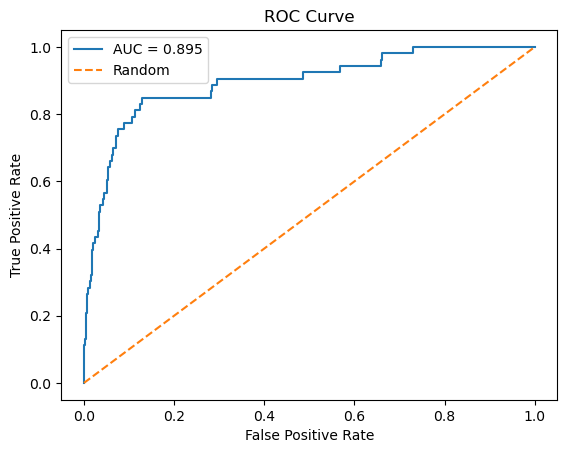

array([[14823,    13],
       [   49,     4]])

In [246]:
evaluate(net)

## 5 layers, 87 neurons

In [247]:
class model_2(nn.Module):   
    def __init__(self,input_dim):
        super(model_2, self).__init__()
        self.fc1 = nn.Linear(input_dim,87)
        self.fc2 = nn.Linear(87,87)
        self.fc3 = nn.Linear(87,87)
        self.fc4 = nn.Linear(87,87)
        self.fc5 = nn.Linear(87,87)
        self.out = nn.Linear(87,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [255]:
net = model_2(input_dim=87)
net

model_2(
  (fc1): Linear(in_features=87, out_features=87, bias=True)
  (fc2): Linear(in_features=87, out_features=87, bias=True)
  (fc3): Linear(in_features=87, out_features=87, bias=True)
  (fc4): Linear(in_features=87, out_features=87, bias=True)
  (fc5): Linear(in_features=87, out_features=87, bias=True)
  (out): Linear(in_features=87, out_features=1, bias=True)
)

In [256]:
train(net,2000,0.0002)

Iteration 0 | Train Loss: 0.6264 | Val Loss: 0.6236 | Val f1: 0.0000 | 
Iteration 50 | Train Loss: 0.3256 | Val Loss: 0.3095 | Val f1: 0.0000 | 
Iteration 100 | Train Loss: 0.0283 | Val Loss: 0.0313 | Val f1: 0.0000 | 
Iteration 150 | Train Loss: 0.0224 | Val Loss: 0.0259 | Val f1: 0.0000 | 
Iteration 200 | Train Loss: 0.0196 | Val Loss: 0.0237 | Val f1: 0.0000 | 
Iteration 250 | Train Loss: 0.0179 | Val Loss: 0.0226 | Val f1: 0.0000 | 
Iteration 300 | Train Loss: 0.0166 | Val Loss: 0.0221 | Val f1: 0.0000 | 
Iteration 350 | Train Loss: 0.0155 | Val Loss: 0.0219 | Val f1: 0.0000 | 
Iteration 400 | Train Loss: 0.0144 | Val Loss: 0.0218 | Val f1: 0.0000 | 
Iteration 450 | Train Loss: 0.0135 | Val Loss: 0.0218 | Val f1: 0.0000 | 
Iteration 500 | Train Loss: 0.0124 | Val Loss: 0.0218 | Val f1: 0.0000 | 
Iteration 550 | Train Loss: 0.0113 | Val Loss: 0.0221 | Val f1: 0.0000 | 
Iteration 600 | Train Loss: 0.0102 | Val Loss: 0.0232 | Val f1: 0.0000 | 
Iteration 650 | Train Loss: 0.0090 | Val 

KeyboardInterrupt: 

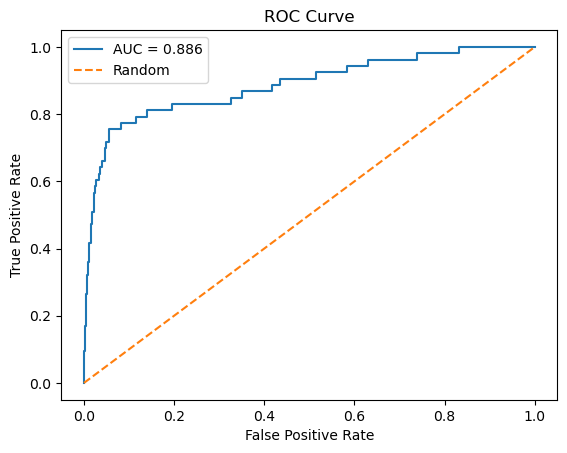

array([[14796,    40],
       [   45,     8]])

In [257]:
evaluate(net)

## 5 layers, 200 neurons

In [288]:
class model_3(nn.Module):   
    def __init__(self,input_dim):
        super(model_3, self).__init__()
        self.fc1 = nn.Linear(input_dim,200)
        self.fc2 = nn.Linear(200,200)
        self.fc3 = nn.Linear(200,200)
        self.fc4 = nn.Linear(200,200)
        self.fc5 = nn.Linear(200,200)
        self.out = nn.Linear(200,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [289]:
net = model_3(input_dim=87)
net

model_3(
  (fc1): Linear(in_features=87, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=200, bias=True)
  (out): Linear(in_features=200, out_features=1, bias=True)
)

In [290]:
train(net,2000,0.0002)

Iteration 0 | Train Loss: 0.7124 | Val Loss: 0.7077 | Val f1: 0.0070 | 
Iteration 50 | Train Loss: 0.0392 | Val Loss: 0.0443 | Val f1: 0.0000 | 
Iteration 100 | Train Loss: 0.0245 | Val Loss: 0.0281 | Val f1: 0.0000 | 
Iteration 150 | Train Loss: 0.0200 | Val Loss: 0.0245 | Val f1: 0.0000 | 
Iteration 200 | Train Loss: 0.0171 | Val Loss: 0.0226 | Val f1: 0.0000 | 
Iteration 250 | Train Loss: 0.0146 | Val Loss: 0.0217 | Val f1: 0.0000 | 
Iteration 300 | Train Loss: 0.0122 | Val Loss: 0.0213 | Val f1: 0.0000 | 
Iteration 350 | Train Loss: 0.0096 | Val Loss: 0.0223 | Val f1: 0.0000 | 
Iteration 400 | Train Loss: 0.0066 | Val Loss: 0.0270 | Val f1: 0.0667 | 
Iteration 450 | Train Loss: 0.0029 | Val Loss: 0.0378 | Val f1: 0.1918 | 
Iteration 500 | Train Loss: 0.0007 | Val Loss: 0.0544 | Val f1: 0.1600 | 
Iteration 550 | Train Loss: 0.0004 | Val Loss: 0.0662 | Val f1: 0.1818 | 
Iteration 600 | Train Loss: 0.0003 | Val Loss: 0.0718 | Val f1: 0.1600 | 


KeyboardInterrupt: 

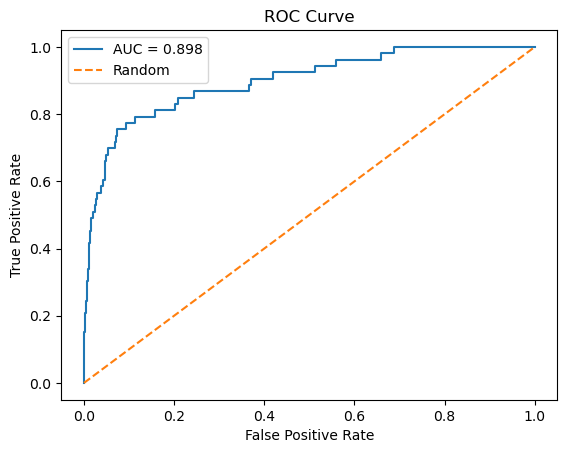

(array([[14802,    34],
        [   42,    11]]),
 0.22448979591836735)

In [291]:
evaluate(net)

## 5 layers, 300 neurons

In [295]:
class model_4(nn.Module):   
    def __init__(self,input_dim):
        super(model_4, self).__init__()
        self.fc1 = nn.Linear(input_dim,300)
        self.fc2 = nn.Linear(300,300)
        self.fc3 = nn.Linear(300,300)
        self.fc4 = nn.Linear(300,300)
        self.fc5 = nn.Linear(300,300)
        self.out = nn.Linear(300,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [302]:
net = model_4(input_dim=87)
net

model_4(
  (fc1): Linear(in_features=87, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=300, bias=True)
  (fc4): Linear(in_features=300, out_features=300, bias=True)
  (fc5): Linear(in_features=300, out_features=300, bias=True)
  (out): Linear(in_features=300, out_features=1, bias=True)
)

In [307]:
train(net,1000,0.0001)

Iteration 0 | Train Loss: 0.0004 | Val Loss: 0.0817 | Val f1: 0.1111 | 
Iteration 50 | Train Loss: 0.0002 | Val Loss: 0.0990 | Val f1: 0.1370 | 


KeyboardInterrupt: 

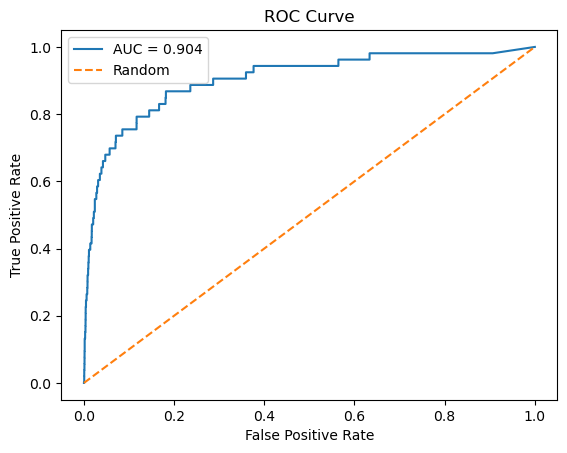

(array([[14797,    39],
        [   46,     7]]),
 0.1414141414141414)

In [308]:
evaluate(net)

# Models with selective variables - 15

## Preparing the data

In [17]:
train_data = pd.read_csv("less_features_train_set_default_next_1y.csv")
test_data = pd.read_csv("less_features_test_set_default_next_1y.csv")
test_data = test_data.dropna().reset_index(drop=True)
train_data = train_data.dropna().reset_index(drop=True)

In [19]:
train_data.shape

(78286, 75)

In [20]:
train_input = train_data[["gross_margin","net_profit_margin","roa",\
  "roe","asset_turnover","cash_to_assets","fixed_asset_intensity",\
  "current_ratio","quick_ratio","debt_to_assets","interest_coverage",\
  "dividend_payout_ratio","capex_to_assets","net_working_capital_to_assets",\
  "cash_conversion_cycle"]]
X_test = test_data[["gross_margin","net_profit_margin","roa",\
  "roe","asset_turnover","cash_to_assets","fixed_asset_intensity",\
  "current_ratio","quick_ratio","debt_to_assets","interest_coverage",\
  "dividend_payout_ratio","capex_to_assets","net_working_capital_to_assets",\
  "cash_conversion_cycle"]]
train_label = pd.DataFrame(train_data["default_next_1y"])
y_test = pd.DataFrame(test_data["default_next_1y"])

In [21]:
train_input = torch.tensor(train_input.values,dtype=torch.float32)
X_test = torch.tensor(X_test.values,dtype=torch.float32)
train_label = torch.tensor(train_label.values,dtype=torch.float32)
y_test = torch.tensor(y_test.values,dtype=torch.float32)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    train_input, train_label,
    test_size=0.25,
    random_state=42,
    stratify=train_label
)

In [23]:
X_train.shape

torch.Size([58714, 15])

In [24]:
X_val.shape

torch.Size([19572, 15])

In [25]:
X_test.shape

torch.Size([19572, 15])

## 1 layer, 30 neurons

In [69]:
class model_5(nn.Module):   
    def __init__(self,input_dim):
        super(model_5, self).__init__()
        self.fc1 = nn.Linear(input_dim,30)
        self.out = nn.Linear(30,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        return self.out(x)

In [73]:
net=model_5(input_dim=15)
net

model_5(
  (fc1): Linear(in_features=15, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=1, bias=True)
)

In [74]:
train(net,3000,0.0002)

Iteration 0 | Train Loss: 0.5236 | Val Loss: 0.5227 | Val f1: 0.0149 | 
Iteration 50 | Train Loss: 0.4855 | Val Loss: 0.4844 | Val f1: 0.0000 | 
Iteration 100 | Train Loss: 0.4489 | Val Loss: 0.4477 | Val f1: 0.0000 | 
Iteration 150 | Train Loss: 0.4131 | Val Loss: 0.4118 | Val f1: 0.0000 | 
Iteration 200 | Train Loss: 0.3777 | Val Loss: 0.3764 | Val f1: 0.0000 | 
Iteration 250 | Train Loss: 0.3430 | Val Loss: 0.3417 | Val f1: 0.0000 | 
Iteration 300 | Train Loss: 0.3095 | Val Loss: 0.3082 | Val f1: 0.0000 | 
Iteration 350 | Train Loss: 0.2779 | Val Loss: 0.2765 | Val f1: 0.0000 | 
Iteration 400 | Train Loss: 0.2486 | Val Loss: 0.2473 | Val f1: 0.0000 | 
Iteration 450 | Train Loss: 0.2221 | Val Loss: 0.2207 | Val f1: 0.0000 | 
Iteration 500 | Train Loss: 0.1983 | Val Loss: 0.1970 | Val f1: 0.0000 | 
Iteration 550 | Train Loss: 0.1772 | Val Loss: 0.1760 | Val f1: 0.0000 | 
Iteration 600 | Train Loss: 0.1587 | Val Loss: 0.1575 | Val f1: 0.0000 | 
Iteration 650 | Train Loss: 0.1426 | Val 

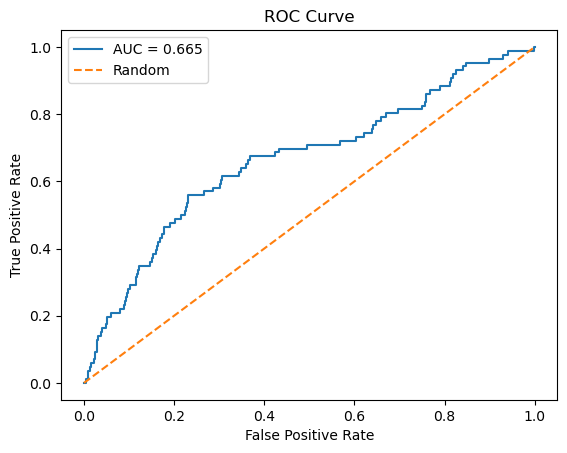

(array([[19486,     0],
        [   86,     0]]),
 0.0)

In [75]:
evaluate(net)

## 5 layers, 30 neurons

In [43]:
class model_6(nn.Module):   
    def __init__(self,input_dim):
        super(model_6, self).__init__()
        self.fc1 = nn.Linear(input_dim,30)
        self.fc2 = nn.Linear(30,30)
        self.fc3 = nn.Linear(30,30)
        self.fc4 = nn.Linear(30,30)
        self.fc5 = nn.Linear(30,30)
        self.out = nn.Linear(30,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [44]:
net=model_6(input_dim=15)
net

model_6(
  (fc1): Linear(in_features=15, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=30, bias=True)
  (fc5): Linear(in_features=30, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=1, bias=True)
)

In [46]:
train(net,1000,0.0001)

Iteration 0 | Train Loss: 0.0292 | Val Loss: 0.0293 | Val f1: 0.0000 | 
Iteration 50 | Train Loss: 0.0281 | Val Loss: 0.0286 | Val f1: 0.0000 | 
Iteration 100 | Train Loss: 0.0273 | Val Loss: 0.0281 | Val f1: 0.0000 | 
Iteration 150 | Train Loss: 0.0266 | Val Loss: 0.0277 | Val f1: 0.0000 | 
Iteration 200 | Train Loss: 0.0260 | Val Loss: 0.0274 | Val f1: 0.0000 | 
Iteration 250 | Train Loss: 0.0254 | Val Loss: 0.0271 | Val f1: 0.0000 | 
Iteration 300 | Train Loss: 0.0248 | Val Loss: 0.0268 | Val f1: 0.0000 | 
Iteration 350 | Train Loss: 0.0243 | Val Loss: 0.0266 | Val f1: 0.0000 | 
Iteration 400 | Train Loss: 0.0239 | Val Loss: 0.0264 | Val f1: 0.0000 | 
Iteration 450 | Train Loss: 0.0235 | Val Loss: 0.0263 | Val f1: 0.0000 | 
Iteration 500 | Train Loss: 0.0231 | Val Loss: 0.0262 | Val f1: 0.0000 | 
Iteration 550 | Train Loss: 0.0228 | Val Loss: 0.0261 | Val f1: 0.0000 | 
Iteration 600 | Train Loss: 0.0224 | Val Loss: 0.0261 | Val f1: 0.0000 | 
Iteration 650 | Train Loss: 0.0220 | Val 

KeyboardInterrupt: 

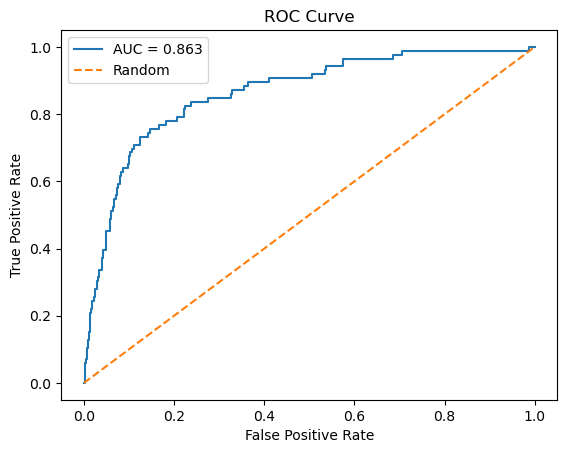

(array([[19486,     0],
        [   86,     0]]),
 0.0)

In [47]:
evaluate(net)

## 5 layers, 60 neurons

In [48]:
class model_7(nn.Module):   
    def __init__(self,input_dim):
        super(model_7, self).__init__()
        self.fc1 = nn.Linear(input_dim,60)
        self.fc2 = nn.Linear(60,60)
        self.fc3 = nn.Linear(60,60)
        self.fc4 = nn.Linear(60,60)
        self.fc5 = nn.Linear(60,60)
        self.out = nn.Linear(60,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [51]:
net=model_7(input_dim=15)
net

model_7(
  (fc1): Linear(in_features=15, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=60, bias=True)
  (fc5): Linear(in_features=60, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=1, bias=True)
)

In [57]:
train(net,1000,0.0001)

Iteration 0 | Train Loss: 0.0095 | Val Loss: 0.0445 | Val f1: 0.1045 | 
Iteration 50 | Train Loss: 0.0094 | Val Loss: 0.0446 | Val f1: 0.1217 | 
Iteration 100 | Train Loss: 0.0092 | Val Loss: 0.0454 | Val f1: 0.1207 | 
Iteration 150 | Train Loss: 0.0090 | Val Loss: 0.0463 | Val f1: 0.1167 | 
Iteration 200 | Train Loss: 0.0088 | Val Loss: 0.0475 | Val f1: 0.1157 | 
Iteration 250 | Train Loss: 0.0086 | Val Loss: 0.0488 | Val f1: 0.0992 | 


KeyboardInterrupt: 

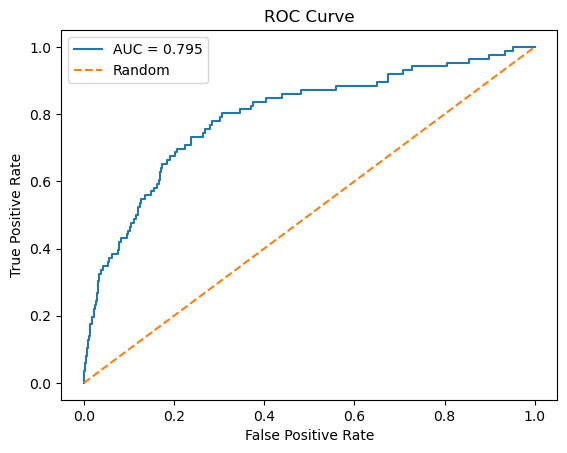

(array([[19449,    37],
        [   83,     3]]),
 0.047619047619047616)

In [58]:
evaluate(net)

## 5 layers, 120 neurons

In [63]:
class model_8(nn.Module):   
    def __init__(self,input_dim):
        super(model_8, self).__init__()
        self.fc1 = nn.Linear(input_dim,120)
        self.fc2 = nn.Linear(120,120)
        self.fc3 = nn.Linear(120,120)
        self.fc4 = nn.Linear(120,120)
        self.fc5 = nn.Linear(120,120)
        self.out = nn.Linear(120,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [64]:
net=model_8(input_dim=15)
net

model_8(
  (fc1): Linear(in_features=15, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=120, bias=True)
  (out): Linear(in_features=120, out_features=1, bias=True)
)

In [66]:
train(net,1000,0.0002)

Iteration 0 | Train Loss: 0.0100 | Val Loss: 0.0472 | Val f1: 0.1145 | 
Iteration 50 | Train Loss: 0.0098 | Val Loss: 0.0373 | Val f1: 0.1120 | 
Iteration 100 | Train Loss: 0.0095 | Val Loss: 0.0382 | Val f1: 0.0504 | 
Iteration 150 | Train Loss: 0.0091 | Val Loss: 0.0392 | Val f1: 0.0656 | 
Iteration 200 | Train Loss: 0.0087 | Val Loss: 0.0404 | Val f1: 0.0952 | 
Iteration 250 | Train Loss: 0.0082 | Val Loss: 0.0421 | Val f1: 0.0945 | 
Iteration 300 | Train Loss: 0.0076 | Val Loss: 0.0441 | Val f1: 0.0938 | 
Iteration 350 | Train Loss: 0.0071 | Val Loss: 0.0463 | Val f1: 0.0909 | 
Iteration 400 | Train Loss: 0.0064 | Val Loss: 0.0491 | Val f1: 0.0909 | 
Iteration 450 | Train Loss: 0.0058 | Val Loss: 0.0523 | Val f1: 0.0889 | 
Iteration 500 | Train Loss: 0.0051 | Val Loss: 0.0560 | Val f1: 0.1000 | 
Iteration 550 | Train Loss: 0.0043 | Val Loss: 0.0605 | Val f1: 0.0966 | 
Iteration 600 | Train Loss: 0.0037 | Val Loss: 0.0651 | Val f1: 0.0833 | 
Iteration 650 | Train Loss: 0.0031 | Val 

KeyboardInterrupt: 

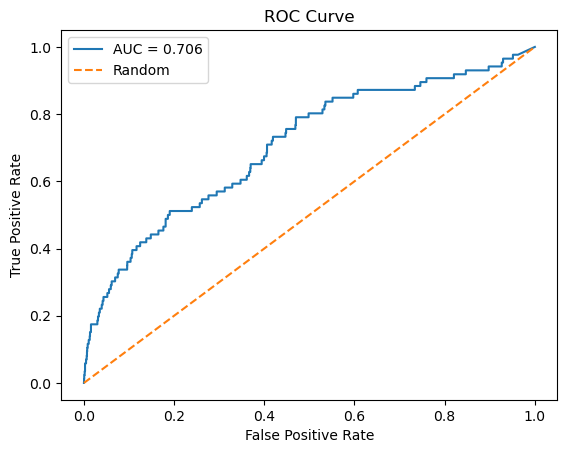

(array([[19441,    45],
        [   83,     3]]),
 0.04477611940298507)

In [67]:
evaluate(net)

# Even less variables - 11

## prepare the data

In [76]:
train_data = pd.read_csv("even_less_features_train_set_default_next_1y.csv")
test_data = pd.read_csv("even_less_features_test_set_default_next_1y.csv")
test_data = test_data.dropna().reset_index(drop=True)
train_data = train_data.dropna().reset_index(drop=True)

In [77]:
train_input = train_data.drop(columns=["default_next_1y"])
X_test = test_data.drop(columns=["default_next_1y"])
train_label = pd.DataFrame(train_data["default_next_1y"])
y_test = pd.DataFrame(test_data["default_next_1y"])

train_input = torch.tensor(train_input.values,dtype=torch.float32)
X_test = torch.tensor(X_test.values,dtype=torch.float32)
train_label = torch.tensor(train_label.values,dtype=torch.float32)
y_test = torch.tensor(y_test.values,dtype=torch.float32)

X_train, X_val, y_train, y_val = train_test_split(
    train_input, train_label,
    test_size=0.25,
    random_state=42,
    stratify=train_label
)

In [78]:
X_train.shape

torch.Size([102032, 11])

In [79]:
X_val.shape

torch.Size([34011, 11])

In [80]:
X_test.shape

torch.Size([34011, 11])

## 1 layer, 10 neurons

In [82]:
class model_9(nn.Module):   
    def __init__(self,input_dim):
        super(model_9, self).__init__()
        self.fc1 = nn.Linear(input_dim,10)
        self.out = nn.Linear(10,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        return self.out(x)

In [87]:
net=model_9(input_dim=11)
net

model_9(
  (fc1): Linear(in_features=11, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)

In [90]:
train(net,500,0.001)

Iteration 0 | Train Loss: 0.0255 | Val Loss: 0.0262 | Val f1: 0.0000 | 
Iteration 50 | Train Loss: 0.0253 | Val Loss: 0.0259 | Val f1: 0.0000 | 
Iteration 100 | Train Loss: 0.0251 | Val Loss: 0.0257 | Val f1: 0.0000 | 
Iteration 150 | Train Loss: 0.0250 | Val Loss: 0.0256 | Val f1: 0.0000 | 
Iteration 200 | Train Loss: 0.0248 | Val Loss: 0.0255 | Val f1: 0.0000 | 
Iteration 250 | Train Loss: 0.0246 | Val Loss: 0.0254 | Val f1: 0.0000 | 
Iteration 300 | Train Loss: 0.0245 | Val Loss: 0.0254 | Val f1: 0.0000 | 
Iteration 350 | Train Loss: 0.0243 | Val Loss: 0.0253 | Val f1: 0.0000 | 
Iteration 400 | Train Loss: 0.0241 | Val Loss: 0.0255 | Val f1: 0.0000 | 
Iteration 450 | Train Loss: 0.0240 | Val Loss: 0.0255 | Val f1: 0.0000 | 


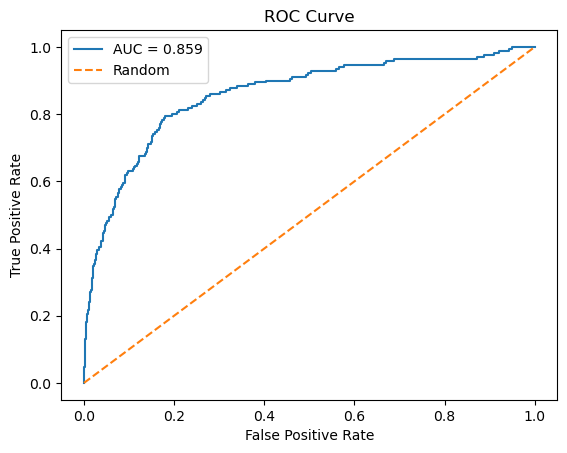

(array([[33839,     2],
        [  170,     0]]),
 0.0)

In [91]:
evaluate(net)

## 5 layers, 10 neurons

In [97]:
class model_10(nn.Module):   
    def __init__(self,input_dim):
        super(model_10, self).__init__()
        self.fc1 = nn.Linear(input_dim,10)
        self.fc2 = nn.Linear(10,10)
        self.fc3 = nn.Linear(10,10)
        self.fc4 = nn.Linear(10,10)
        self.fc5 = nn.Linear(10,10)
        self.out = nn.Linear(10,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [100]:
net=model_10(input_dim=11)
net

model_10(
  (fc1): Linear(in_features=11, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)

In [108]:
train(net,500,0.0005)

Iteration 0 | Train Loss: 0.0222 | Val Loss: 0.0255 | Val f1: 0.0231 | 
Iteration 50 | Train Loss: 0.0222 | Val Loss: 0.0254 | Val f1: 0.0230 | 
Iteration 100 | Train Loss: 0.0222 | Val Loss: 0.0254 | Val f1: 0.0230 | 
Iteration 150 | Train Loss: 0.0222 | Val Loss: 0.0254 | Val f1: 0.0230 | 
Iteration 200 | Train Loss: 0.0221 | Val Loss: 0.0255 | Val f1: 0.0230 | 
Iteration 250 | Train Loss: 0.0221 | Val Loss: 0.0254 | Val f1: 0.0230 | 
Iteration 300 | Train Loss: 0.0221 | Val Loss: 0.0254 | Val f1: 0.0230 | 
Iteration 350 | Train Loss: 0.0221 | Val Loss: 0.0254 | Val f1: 0.0230 | 
Iteration 400 | Train Loss: 0.0221 | Val Loss: 0.0254 | Val f1: 0.0230 | 
Iteration 450 | Train Loss: 0.0220 | Val Loss: 0.0254 | Val f1: 0.0230 | 


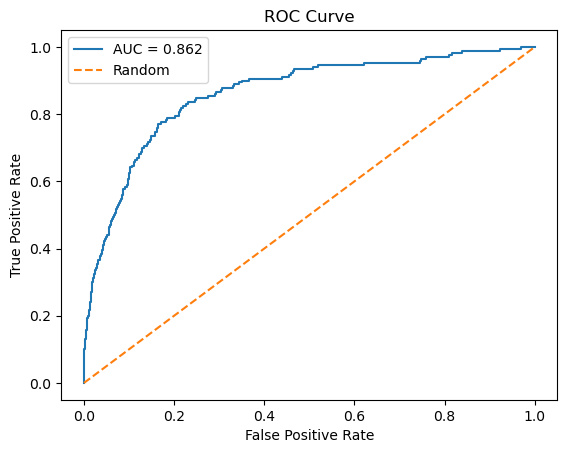

(array([[33838,     3],
        [  164,     6]]),
 0.0670391061452514)

In [109]:
evaluate(net)

## 5 layers, 20 neurons

In [111]:
class model_11(nn.Module):   
    def __init__(self,input_dim):
        super(model_11, self).__init__()
        self.fc1 = nn.Linear(input_dim,20)
        self.fc2 = nn.Linear(20,20)
        self.fc3 = nn.Linear(20,20)
        self.fc4 = nn.Linear(20,20)
        self.fc5 = nn.Linear(20,20)
        self.out = nn.Linear(20,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [114]:
net=model_11(input_dim=11)
net

model_11(
  (fc1): Linear(in_features=11, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
)

In [122]:
train(net,1000,0.001)

Iteration 0 | Train Loss: 0.0203 | Val Loss: 0.0657 | Val f1: 0.0932 | 
Iteration 50 | Train Loss: 0.0207 | Val Loss: 0.0296 | Val f1: 0.0201 | 
Iteration 100 | Train Loss: 0.0204 | Val Loss: 0.0297 | Val f1: 0.0300 | 
Iteration 150 | Train Loss: 0.0203 | Val Loss: 0.0299 | Val f1: 0.0200 | 
Iteration 200 | Train Loss: 0.0203 | Val Loss: 0.0300 | Val f1: 0.0200 | 
Iteration 250 | Train Loss: 0.0203 | Val Loss: 0.0300 | Val f1: 0.0200 | 
Iteration 300 | Train Loss: 0.0203 | Val Loss: 0.0300 | Val f1: 0.0200 | 
Iteration 350 | Train Loss: 0.0203 | Val Loss: 0.0301 | Val f1: 0.0199 | 
Iteration 400 | Train Loss: 0.0203 | Val Loss: 0.0301 | Val f1: 0.0199 | 
Iteration 450 | Train Loss: 0.0203 | Val Loss: 0.0301 | Val f1: 0.0199 | 
Iteration 500 | Train Loss: 0.0202 | Val Loss: 0.0302 | Val f1: 0.0199 | 
Iteration 550 | Train Loss: 0.0202 | Val Loss: 0.0302 | Val f1: 0.0199 | 
Iteration 600 | Train Loss: 0.0202 | Val Loss: 0.0303 | Val f1: 0.0199 | 
Iteration 650 | Train Loss: 0.0202 | Val 

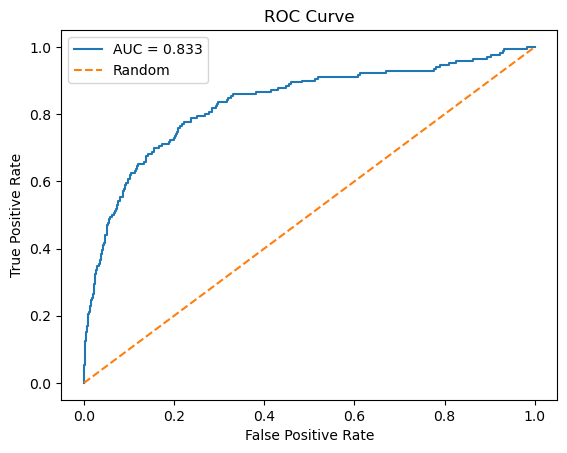

(array([[33819,    22],
        [  167,     3]]),
 0.03076923076923077)

In [123]:
evaluate(net)

## 5 layers, 30 neurons

In [124]:
class model_12(nn.Module):   
    def __init__(self,input_dim):
        super(model_12, self).__init__()
        self.fc1 = nn.Linear(input_dim,30)
        self.fc2 = nn.Linear(30,30)
        self.fc3 = nn.Linear(30,30)
        self.fc4 = nn.Linear(30,30)
        self.fc5 = nn.Linear(30,30)
        self.out = nn.Linear(30,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [125]:
net=model_12(input_dim=11)
net

model_12(
  (fc1): Linear(in_features=11, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=30, bias=True)
  (fc5): Linear(in_features=30, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
train(net,1000,0.005)

Iteration 0 | Train Loss: 0.0212 | Val Loss: 0.0307 | Val f1: 0.0117 | 
Iteration 50 | Train Loss: 0.0191 | Val Loss: 0.0346 | Val f1: 0.0328 | 
Iteration 100 | Train Loss: 0.0180 | Val Loss: 0.0393 | Val f1: 0.0312 | 
Iteration 150 | Train Loss: 0.0173 | Val Loss: 0.0430 | Val f1: 0.0490 | 
Iteration 200 | Train Loss: 0.0177 | Val Loss: 0.0417 | Val f1: 0.0478 | 
Iteration 250 | Train Loss: 0.0161 | Val Loss: 0.0479 | Val f1: 0.0625 | 
Iteration 300 | Train Loss: 0.0177 | Val Loss: 0.0405 | Val f1: 0.0421 | 
Iteration 350 | Train Loss: 0.0160 | Val Loss: 0.0501 | Val f1: 0.0286 | 
Iteration 400 | Train Loss: 0.0248 | Val Loss: 0.0453 | Val f1: 0.0101 | 
Iteration 450 | Train Loss: 0.0171 | Val Loss: 0.0455 | Val f1: 0.0410 | 
Iteration 500 | Train Loss: 0.0154 | Val Loss: 0.0536 | Val f1: 0.0541 | 
Iteration 550 | Train Loss: 0.0171 | Val Loss: 0.0496 | Val f1: 0.0302 | 
Iteration 600 | Train Loss: 0.0146 | Val Loss: 0.0553 | Val f1: 0.0522 | 
Iteration 650 | Train Loss: 0.0212 | Val 

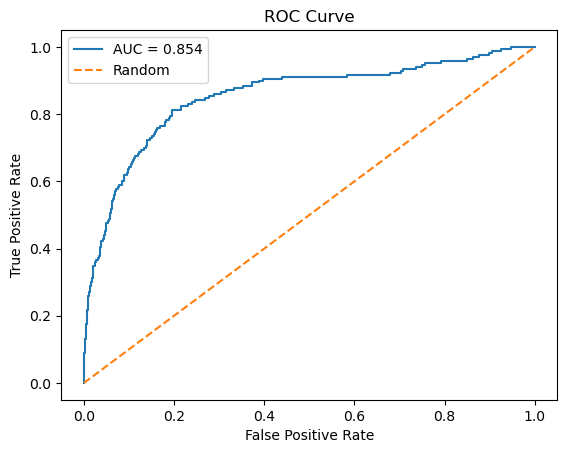

(array([[33836,     5],
        [  166,     4]]),
 0.0446927374301676)

In [130]:
evaluate(net)